# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

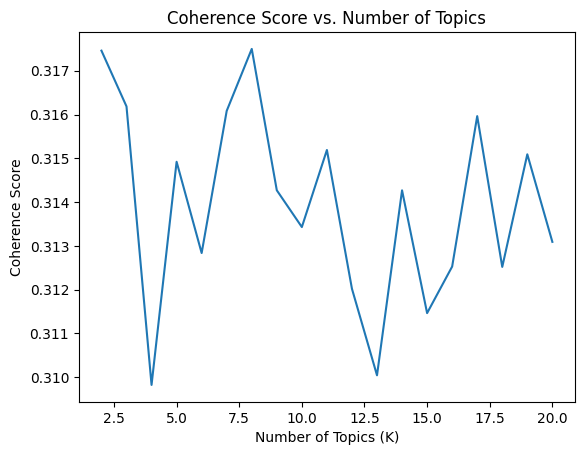

Topic 1: 0.038*"eius" + 0.036*"aliquam" + 0.033*"dolor" + 0.033*"tempora" + 0.032*"velit" + 0.028*"porro" + 0.027*"adipisci" + 0.026*"amet" + 0.026*"quaerat" + 0.026*"quisquam"
Topic 2: 0.034*"adipisci" + 0.033*"numquam" + 0.031*"non" + 0.030*"aliquam" + 0.028*"labore" + 0.028*"dolore" + 0.028*"tempora" + 0.027*"modi" + 0.026*"sed" + 0.026*"eius"
Topic 3: 0.040*"sed" + 0.036*"quaerat" + 0.035*"quisquam" + 0.029*"dolorem" + 0.028*"numquam" + 0.027*"labore" + 0.026*"velit" + 0.026*"neque" + 0.026*"modi" + 0.026*"eius"
Topic 4: 0.039*"labore" + 0.039*"quaerat" + 0.033*"dolor" + 0.033*"sed" + 0.028*"voluptatem" + 0.027*"amet" + 0.026*"aliquam" + 0.026*"eius" + 0.026*"tempora" + 0.024*"adipisci"
Topic 5: 0.036*"velit" + 0.031*"numquam" + 0.029*"tempora" + 0.029*"sit" + 0.028*"adipisci" + 0.028*"consectetur" + 0.028*"labore" + 0.027*"neque" + 0.027*"etincidunt" + 0.026*"voluptatem"
Topic 6: 0.035*"dolore" + 0.030*"est" + 0.030*"labore" + 0.029*"non" + 0.029*"ipsum" + 0.029*"magnam" + 0.027*"

In [1]:
# Write your code here

import warnings
warnings.filterwarnings("ignore")

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import random
import lorem

# Generate random input data (replace this with your actual data)
random.seed(42)  # Set a seed for reproducibility
num_documents = 100
documents = [lorem.text() for _ in range(num_documents)]

# Tokenize and preprocess your data (use your own preprocessing if needed)
tokenized_data = [doc.split() for doc in documents]

# Create a dictionary and a corpus
dictionary = Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

# Create a list to store coherence scores
coherence_scores = []

# Define a range of K values to consider
k_values = range(2, 21)  # You can adjust the range

# Iterate over different K values
for k in k_values:
    lda_model = LdaModel(corpus, num_topics=k, id2word=dictionary)

    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.plot(k_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Determine the optimal K with the highest coherence score
optimal_k = k_values[coherence_scores.index(max(coherence_scores))]

# Train the LDA model with the optimal K
optimal_lda_model = LdaModel(corpus, num_topics=optimal_k, id2word=dictionary)

# Summarize the topics
topics = optimal_lda_model.print_topics(num_words=10)  # You can adjust the number of words
for topic_num, topic in topics:
    print(f"Topic {topic_num + 1}: {topic}")


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [2]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import random
import lorem

# Generate random input data (replace this with your actual data)
random.seed(42)  # Set a seed for reproducibility
num_documents = 100
documents = [lorem.text() for _ in range(num_documents)]

# Tokenize and preprocess your data (use your own preprocessing if needed)
# ...

# Create a TF-IDF vectorizer with adjusted min_df and max_df
tfidf_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.99, max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Specify the number of topics (K) in advance
K = 5  # You need to set this based on your requirements

# Train the LSA model with the specified K
lsa_model = TruncatedSVD(n_components=K)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Summarize the topics based on the LSA model
# You can use the components of the LSA model to identify the most important terms for each topic
for topic_num in range(K):
    top_terms_indices = lsa_model.components_[topic_num].argsort()[::-1][:10]  # Select the top 10 terms
    top_terms = [tfidf_vectorizer.get_feature_names_out()[index] for index in top_terms_indices]
    print(f"Topic {topic_num + 1}: {', '.join(top_terms)}")


Topic 1: dolor, consectetur, neque, ipsum, sit, adipisci, numquam
Topic 2: neque, ipsum, sit, dolor, adipisci, consectetur, numquam
Topic 3: ipsum, adipisci, neque, numquam, consectetur, dolor, sit
Topic 4: numquam, neque, dolor, sit, ipsum, adipisci, consectetur
Topic 5: dolor, adipisci, ipsum, numquam, sit, consectetur, neque


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [3]:
# Write your code here
import warnings
warnings.filterwarnings("ignore")

from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import random
import lorem

# Generate random input data (replace this with your actual data)
random.seed(42)  # Set a seed for reproducibility
num_documents = 100
documents = [lorem.text() for _ in range(num_documents)]

# Tokenize and preprocess your data (use your own preprocessing if needed)
# ...

# Create a dictionary and a corpus
dictionary = Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

# Determine the optimal number of topics (K) using coherence scores
coherence_scores = []
k_values = range(2, 21)  # You can adjust the range

for k in k_values:
    lda_model = LdaModel(corpus, num_topics=k, id2word=dictionary)

    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    coherence_scores.append(coherence_score)

# Determine the optimal K with the highest coherence score
optimal_k = k_values[coherence_scores.index(max(coherence_scores))]

# Train the LdaModel with the optimal K
optimal_lda_model = LdaModel(corpus, num_topics=optimal_k, id2word=dictionary)

# Summarize the topics based on the LDA model
topics = optimal_lda_model.print_topics(num_words=10)  # You can adjust the number of words
for topic_num, topic in topics:
    print(f"Topic {topic_num + 1}: {topic}")


Topic 1: 0.037*"sed" + 0.030*"dolore" + 0.029*"eius" + 0.028*"amet" + 0.028*"consectetur" + 0.028*"magnam" + 0.027*"non" + 0.027*"ut" + 0.027*"quisquam" + 0.026*"aliquam"
Topic 2: 0.032*"tempora" + 0.030*"porro" + 0.029*"quisquam" + 0.029*"non" + 0.029*"quaerat" + 0.029*"adipisci" + 0.028*"neque" + 0.028*"ipsum" + 0.028*"dolorem" + 0.027*"est"
Topic 3: 0.036*"dolor" + 0.032*"dolorem" + 0.029*"sit" + 0.029*"neque" + 0.028*"labore" + 0.028*"quaerat" + 0.027*"ipsum" + 0.027*"etincidunt" + 0.027*"porro" + 0.027*"adipisci"


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [4]:
# Write your code here

from bertopic import BERTopic
import spacy
import random
import lorem
import pandas as pd

# Generate random input data (replace this with your actual data)
random.seed(42)
num_documents = 100
documents = [lorem.text() for _ in range(num_documents)]

# Tokenize and preprocess your data using spaCy (you can replace this with your own preprocessing)
nlp = spacy.load("en_core_web_sm")

tokenized_documents = []

for doc in documents:
    doc = nlp(doc)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    tokenized_doc = " ".join(tokens)
    tokenized_documents.append(tokenized_doc)

# Create a BERTopic model
model = BERTopic()

# Determine the optimal number of topics using BERTopic's coherence score
optimal_k = model.fit(tokenized_documents)

# Fit the model with the optimal number of topics
topics, _ = model.transform(tokenized_documents)

# Summarize the topics
topic_words = model.get_topic_info()
topic_words = topic_words.set_index('Topic')
print(topic_words)

       Count                             Name  \
Topic                                           
-1        39               -1_ut_non_eius_sit   
 0        23    0_labore_dolor_quaerat_magnam   
 1        23     1_dolore_dolorem_non_quaerat   
 2        15  2_quisquam_amet_magnam_adipisci   

                                          Representation  \
Topic                                                      
-1     [ut, non, eius, sit, modi, tempora, quiquia, c...   
 0     [labore, dolor, quaerat, magnam, est, neque, s...   
 1     [dolore, dolorem, non, quaerat, ipsum, adipisc...   
 2     [quisquam, amet, magnam, adipisci, aliquam, vo...   

                                     Representative_Docs  
Topic                                                     
-1     [Neque velit modi eius quaerat Porro eius ut m...  
 0     [Quaerat sed quisquam voluptatem numquam quiqu...  
 1     [Quisquam tempora sed velit Non dolore adipisc...  
 2     [Quisquam quiquia adipisci aliquam magnam 

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [5]:
# Write your answer here (no code needed for this question)


'''

Comparing the results of different topic modeling algorithms, such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), Lda2vec, and BERTopic, to determine which one is better depends on several factors and the specific characteristics of your dataset and use case. Each of these algorithms has its own strengths and weaknesses. Here's a detailed comparison of these four topic modeling methods:

1. Latent Dirichlet Allocation (LDA):
   - Strengths:
     - Interpretable topics: LDA provides human-readable topics composed of words.
     - Well-established: LDA is a widely-used and well-understood method for topic modeling.
     - Coherence scoring: You can use coherence scores to help determine the number of topics and evaluate the quality of topics.
   - Weaknesses:
     - Assumes a bag-of-words model: LDA does not consider word semantics or document structure.
     - May require hyperparameter tuning: Selecting the optimal number of topics (K) can be challenging.
   - **Best Use Cases:**
     - LDA is suitable for tasks where interpretable and coherent topics are required, such as content recommendation, document categorization, and text summarization.

2. Latent Semantic Analysis (LSA):
   - Strengths:
     - Dimensionality reduction: LSA reduces the dimensionality of the term-document matrix, helping to identify latent topics.
     - Captures semantic meaning: LSA can capture semantic relationships between words.
   - Weaknesses:
     - Less interpretable: LSA may not produce topics that are as human-readable as LDA.
     - Sensitivity to term frequency: LSA may be sensitive to the frequency of terms in documents.
   - **Best Use Cases:**
     - LSA is useful when you want to capture semantic relationships between words and documents, making it suitable for information retrieval and document clustering tasks.

3. Lda2vec:
   - Strengths:
     - Combines word embeddings: Lda2vec integrates the strengths of LDA and word embeddings, potentially producing better topics.
     - Captures both word and document semantics: It can capture semantic information from both words and documents.
   - Weaknesses:
     - Limited library support: There are fewer readily available libraries and resources for Lda2vec compared to LDA and LSA.
     - Complex implementation: Implementing Lda2vec may require more effort and expertise.
   - **Best Use Cases:**
     - Lda2vec is a good choice when you want to leverage both word embeddings and topic modeling for complex semantic understanding in documents.

4. BERTopic:
   - Strengths:
     - Contextual embeddings: BERTopic uses contextual word embeddings (via BERT), allowing it to capture fine-grained semantic meaning.
     - No need for specifying K: BERTopic automatically determines the number of topics.
     - Highly interpretable: Topics are based on words and phrases, making them interpretable.
   - Weaknesses:
     - Computational cost: BERTopic may require more computational resources compared to some traditional methods.
     - Lack of widespread library support: BERTopic is relatively newer and may have fewer resources and support compared to LDA and LSA.
   - **Best Use Cases:**
     - BERTopic is useful when you want to benefit from contextual embeddings and need interpretable topics without specifying the number of topics in advance.

Choosing the best topic modeling method depends on your specific needs and constraints:

- If you prioritize interpretability and established methods, LDA may be your choice.
- If capturing semantic relationships between words is crucial, LSA is a good option.
- If you want to leverage both word embeddings and traditional topic modeling, Lda2vec could be worth exploring.
- If you need highly interpretable topics based on contextual embeddings and don't mind the computational cost, BERTopic may be suitable.

Ultimately, the "best" method depends on your specific objectives and the characteristics of your data. It's often a good practice to experiment with multiple methods and evaluate them based on your particular requirements.

'''


'\n\nComparing the results of different topic modeling algorithms, such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), Lda2vec, and BERTopic, to determine which one is better depends on several factors and the specific characteristics of your dataset and use case. Each of these algorithms has its own strengths and weaknesses. Here\'s a detailed comparison of these four topic modeling methods:\n\n1. Latent Dirichlet Allocation (LDA):\n   - Strengths:\n     - Interpretable topics: LDA provides human-readable topics composed of words.\n     - Well-established: LDA is a widely-used and well-understood method for topic modeling.\n     - Coherence scoring: You can use coherence scores to help determine the number of topics and evaluate the quality of topics.\n   - Weaknesses:\n     - Assumes a bag-of-words model: LDA does not consider word semantics or document structure.\n     - May require hyperparameter tuning: Selecting the optimal number of topics (K) can be chall